In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

In [2]:
beer_df=pd.read_csv("../Resources/clean_beer_data_try2.csv")
beer_df.head()

,index,beer_name,brewery_name,beer_style,country,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_review_count,brewery_review,brewery_review_count,lat,lng,beer_id,brewery_id
0,0,(512) IPA,(512) Brewing Company,American IPA,United States,7.0,4.259259,4.129630,4.009259,4.101852,4.185185,54,4.22,135,30.222972,-97.770152,43535,17863
1,1,(512) Pecan Porter,(512) Brewing Company,American Porter,United States,6.8,4.185185,4.067901,4.166667,3.981481,4.166667,81,4.22,135,30.222972,-97.770152,45617,17863
2,2,Hell Or High Watermelon Wheat Beer,21st Amendment Brewery,Fruit / Vegetable Beer,United States,4.9,3.388771,3.116525,3.237288,3.325212,3.237288,472,3.71,2767,37.782525,-122.392460,4202,735
3,3,21st Amendment IPA,21st Amendment Brewery,American IPA,United States,7.0,3.890769,3.801538,3.977692,3.771538,3.767692,650,3.71,2767,37.782525,-122.392460,20781,735
4,4,Bitter American,21st Amendment Brewery,American Pale Ale (APA),United States,4.4,4.118421,3.921053,3.927632,3.769737,3.898026,152,3.71,2767,37.782525,-122.392460,34791,735


In [3]:
best_beer=beer_df.loc[beer_df["review_overall"].idxmax()]
print(f'The best overall beer is {best_beer["beer_name"]} from {best_beer["brewery_name"]}')

best_aroma=beer_df.loc[beer_df["review_aroma"].idxmax()]
print(f'The beer with the best aroma is {best_aroma["beer_name"]} from {best_aroma["brewery_name"]}')

best_appearance=beer_df.loc[beer_df["review_appearance"].idxmax()]
print(f'The beer with the best appearance is {best_appearance["beer_name"]} from {best_appearance["brewery_name"]}')

best_taste=beer_df.loc[beer_df["review_taste"].idxmax()]
print(f'The beer with the best taste is {best_taste["beer_name"]} from {best_taste["brewery_name"]}')

best_palate=beer_df.loc[beer_df["review_palate"].idxmax()]
print(f'The beer with the best palate is {best_palate["beer_name"]} from {best_palate["brewery_name"]}')

The best overall beer is Armand'4 Oude Geuze Lente (Spring) from Brouwerij Drie Fonteinen
The beer with the best aroma is Pliny The Younger from Russian River Brewing Company
The beer with the best appearance is Cantillon Blåbær Lambik from Brasserie Cantillon
The beer with the best taste is Rare Bourbon County Stout from Goose Island Beer Co.
The beer with the best palate is Vanilla Bean Aged Dark Lord from Three Floyds Brewing Co. & Brewpub


In [4]:
worst_beer=beer_df.loc[beer_df["review_overall"].idxmin()]
print(f'The worst overall beer is {worst_beer["beer_name"]} from {worst_beer["brewery_name"]}')

worst_aroma=beer_df.loc[beer_df["review_aroma"].idxmin()]
print(f'The beer with the worst aroma is {worst_aroma["beer_name"]} from {worst_aroma["brewery_name"]}')

worst_appearance=beer_df.loc[beer_df["review_appearance"].idxmin()]
print(f'The beer with the worst appearance is {worst_appearance["beer_name"]} from {worst_appearance["brewery_name"]}')

worst_taste=beer_df.loc[beer_df["review_taste"].idxmin()]
print(f'The beer with the worst taste is {worst_taste["beer_name"]} from {worst_taste["brewery_name"]}')

worst_palate=beer_df.loc[beer_df["review_palate"].idxmin()]
print(f'The beer with the worst palate is {worst_palate["beer_name"]} from {worst_palate["brewery_name"]}')

The worst overall beer is Crazy Ed's Cave Creek Chili Beer from Chili Beer Co.
The beer with the worst aroma is Corona Light from Grupo Modelo S.A. de C.V.
The beer with the worst appearance is Michelob Ultra from Anheuser-Busch
The beer with the worst taste is Corona Light from Grupo Modelo S.A. de C.V.
The beer with the worst palate is Crazy Ed's Cave Creek Chili Beer from Chili Beer Co.


In [5]:
def lin_reg_plot(x_data,y_data,x_label,y_label,title,x_pos,y_pos,figname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
    print(f"The r-value is: {round(rvalue,3)}")
    regress_values = x_data * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_data,y_data)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data,regress_values,"r-")
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="red")
    plt.savefig(f"../Images/{figname}.png")

The r-value is: 0.838


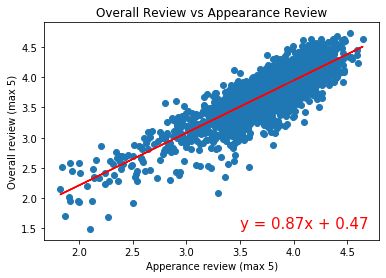

In [6]:
lin_reg_plot(beer_df["review_appearance"],beer_df["review_overall"],"Apperance review (max 5)","Overall review (max 5)",
             "Overall Review vs Appearance Review",3.5,1.5,"AppvsAll")

The r-value is: 0.869


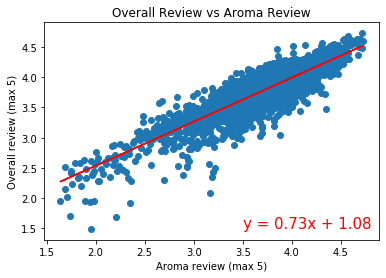

In [7]:
lin_reg_plot(beer_df["review_aroma"],beer_df["review_overall"],"Aroma review (max 5)","Overall review (max 5)",
             "Overall Review vs Aroma Review",3.5,1.5,"AromavsAll")

The r-value is: 0.928


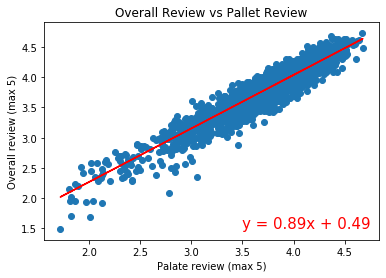

In [8]:
lin_reg_plot(beer_df["review_palate"],beer_df["review_overall"],"Palate review (max 5)","Overall review (max 5)",
             "Overall Review vs Pallet Review",3.5,1.5,"PalvsAll")

The r-value is: 0.944


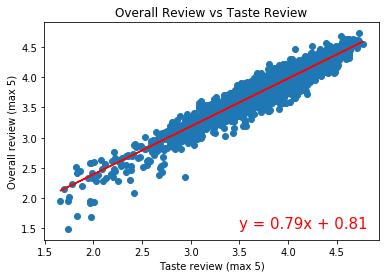

In [9]:
lin_reg_plot(beer_df["review_taste"],beer_df["review_overall"],"Taste review (max 5)","Overall review (max 5)",
             "Overall Review vs Taste Review",3.5,1.5,"TastevsAll")

The r-value is: 0.247


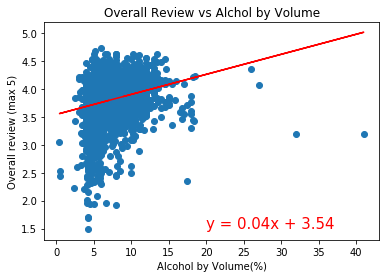

In [10]:
lin_reg_plot(beer_df["beer_abv"],beer_df["review_overall"],"Alcohol by Volume(%)","Overall review (max 5)",
             "Overall Review vs Alchol by Volume",20,1.5,"AbvvsAll")

The r-value is: 0.167


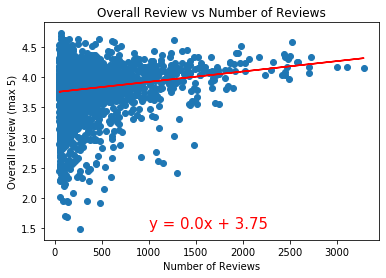

In [11]:
lin_reg_plot(beer_df["beer_review_count"],beer_df["review_overall"],"Number of Reviews","Overall review (max 5)",
             "Overall Review vs Number of Reviews",1000,1.5,"CountvsAll")

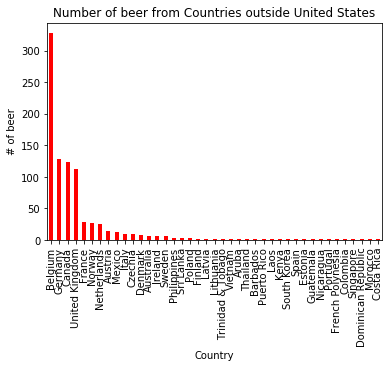

<Figure size 432x288 with 0 Axes>

In [12]:
no_USA_df=beer_df.loc[(beer_df["country"]!="United States"),:]
country_count=no_USA_df["country"].value_counts()
y_axis=country_count.values
x_axis=country_count.index

country_count.plot(kind="bar",facecolor="red")

plt.ylabel("# of beer")
plt.xlabel("Country")
plt.title("Number of beer from Countries outside United States")
plt.show()
plt.savefig(f"../Images/CountryBar.png")

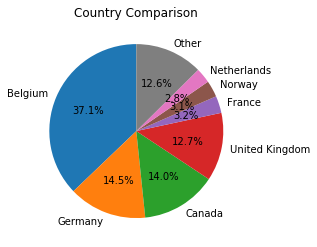

<Figure size 432x288 with 0 Axes>

In [13]:
country_pie=country_count[country_count>=15]
country_pie["Other"]=country_count[country_count<15].sum()
country_pie.plot(kind="pie",autopct="%1.1f%%",startangle=90)
plt.title("Country Comparison")
plt.ylabel("")
plt.show()
plt.savefig(f"../Images/countryPie.png")

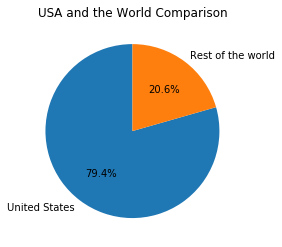

<Figure size 432x288 with 0 Axes>

In [14]:
all_country_count=beer_df["country"].value_counts()
all_country_count["Rest of the world"]=country_count.sum()
all_country_count=all_country_count[all_country_count>400]
all_country_count.plot(kind="pie",autopct="%1.1f%%",startangle=90)
plt.title("USA and the World Comparison")
plt.ylabel("")
plt.show()
plt.savefig(f"../Images/USandROWPie.png")

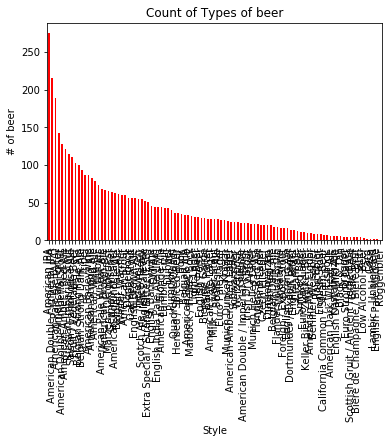

<Figure size 432x288 with 0 Axes>

In [15]:
style_count=beer_df["beer_style"].value_counts()
y_axis=style_count.values
x_axis=style_count.index

style_count.plot(kind="bar",facecolor="red")
plt.ylabel("# of beer")
plt.xlabel("Style")
plt.title("Count of Types of beer")
plt.show()
plt.savefig(f"../Images/BeerTypeAllBar.png")

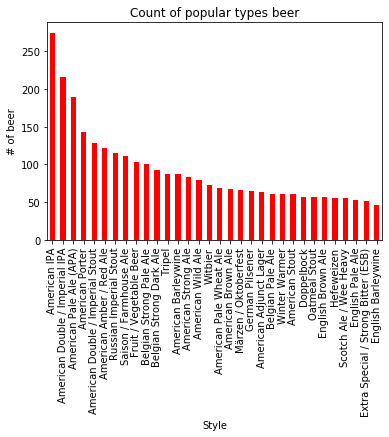

<Figure size 432x288 with 0 Axes>

In [16]:
style_count=style_count[style_count>45]
y_axis=style_count.values
x_axis=style_count.index

style_count.plot(kind="bar",facecolor="red")

plt.ylabel("# of beer")
plt.xlabel("Style")
plt.title("Count of popular types beer")
plt.show()
plt.savefig(f"../Images/PopBeerTypeBar.png")